In [1]:
# Standard library imports
import logging
from pathlib import Path
from typing import Dict, List, Tuple, Optional, Union
import warnings
warnings.filterwarnings('ignore')

# Scientific computing
import numpy as np
import pandas as pd
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import seaborn as sns


# Machine learning
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Visualization
from cycler import cycler
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

print("✓ All imports successful")
logger.info("Setup complete")


2025-08-03 19:49:07,397 - INFO - Setup complete


✓ All imports successful


## ⚙️ Professional Styling Configuration

Set up consistent, publication-ready styling for all plots.

In [2]:
# Professional styling configuration
def setup_plot_style():
    """Configure matplotlib with professional, publication-ready defaults."""
    
    # General appearance
    plt.rcParams.update({
        'figure.facecolor': 'white',
        'axes.facecolor': 'white',
        'savefig.facecolor': 'white',
        'savefig.dpi': 300,
        'figure.dpi': 100,
        
        # Typography
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans'],
        'font.size': 10,
        'axes.titlesize': 16,
        'axes.titleweight': 'bold',
        'axes.labelsize': 14,
        'axes.labelweight': 'semibold',
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        
        # Line and marker properties
        'axes.linewidth': 2.0,
        'lines.linewidth': 2.0,
        'lines.markersize': 6,
        'patch.linewidth': 2.0,
        
        # Spine and tick properties
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'xtick.bottom': True,
        'xtick.top': False,
        'ytick.left': True,
        'ytick.right': False,
        
        # Grid properties
        'axes.grid': False,
        'grid.alpha': 0.3,
        'grid.linewidth': 0.8,
        'axes.axisbelow': True,
        
        # Legend properties
        'legend.frameon': True,
        'legend.numpoints': 1,
    })

def clean_axes(ax):
    """Apply clean styling to axes - removes top and right spines."""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)
    ax.grid(True, alpha=0.3, linewidth=0.8)
    return ax

def add_stats_annotation(ax, text, x=0.05, y=0.95):
    """Add statistical annotation to plot."""
    ax.text(x, y, text, transform=ax.transAxes, 
           bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
           verticalalignment='top', fontsize=9)

def save_plot(fig, filename, formats=['png', 'svg'], dpi=300):
    """Save plot in multiple formats with consistent settings."""
    for fmt in formats:
        filepath = Path(f"{filename}.{fmt}")
        fig.savefig(filepath, format=fmt, dpi=dpi, bbox_inches='tight',
                   facecolor='white', edgecolor='none')
    print(f"Plot saved as: {', '.join([f'{filename}.{fmt}' for fmt in formats])}")

# Apply the styling
setup_plot_style()
print("Professional styling configuration applied!")

# Standard figure sizes for different use cases
FIGURE_SIZES = {
    'small': (4, 3),      # Single plots, supplements
    'medium': (6, 4.5),   # Standard journal figures  
    'large': (8, 6),      # Complex plots with multiple elements
    'wide': (10, 4),      # Time series, genomic data
    'square': (4, 4),     # Correlation plots, heatmaps
}

FIGURE_DPI = 300

print("Available figure sizes:", list(FIGURE_SIZES.keys()))


Professional styling configuration applied!
Available figure sizes: ['small', 'medium', 'large', 'wide', 'square']


## 🎨 Custom Color Palette

Professional color palette organized by hue families for better visual harmony and accessibility.


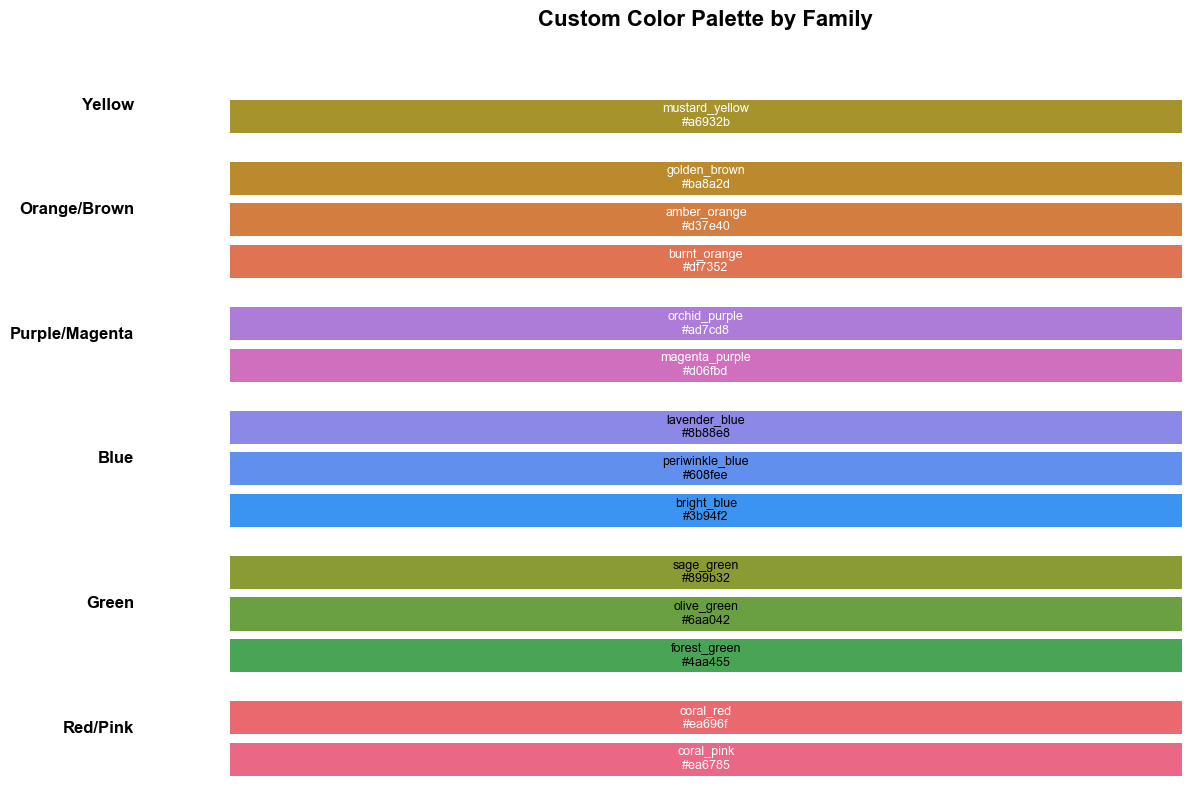

Color palette loaded successfully!
Primary trio: ['#ea696f', '#6aa042', '#608fee']
Four-category palette: ['#ea696f', '#6aa042', '#608fee', '#ad7cd8']


In [ ]:
# Custom Color Palette - Organized by families
COLORS = {
    'coral_pink': '#ea6785',
    'forest_green': '#4aa455',
    'bright_blue': '#3b94f2',
    'magenta_purple': '#d06fbd',
    'golden_brown': '#ba8a2d',
    'coral_red': '#ea696f',
    'olive_green': '#6aa042',
    'periwinkle_blue': '#608fee',
    'burnt_orange': '#df7352',
    'sage_green': '#899b32',
    'lavender_blue': '#8b88e8',
    'amber_orange': '#d37e40',
    'mustard_yellow': '#a6932b',
    'orchid_purple': '#ad7cd8'
}

# Recommended color combinations
PRIMARY_TRIO = [COLORS['coral_red'], COLORS['olive_green'], COLORS['periwinkle_blue']]
FOUR_CATEGORY = PRIMARY_TRIO + [COLORS['orchid_purple']]
SIX_CATEGORY = FOUR_CATEGORY + [COLORS['magenta_purple'], COLORS['golden_brown']]

# Set as default matplotlib color cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=PRIMARY_TRIO)

# Display color palette
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
families = {
    'Red/Pink': ['coral_pink', 'coral_red'],
    'Green': ['forest_green', 'olive_green', 'sage_green'],
    'Blue': ['bright_blue', 'periwinkle_blue', 'lavender_blue'],
    'Purple/Magenta': ['magenta_purple', 'orchid_purple'],
    'Orange/Brown': ['burnt_orange', 'amber_orange', 'golden_brown'],
    'Yellow': ['mustard_yellow']
}

y_pos = 0
for family_name, color_names in families.items():
    for i, color_name in enumerate(color_names):
        ax.barh(y_pos, 1, color=COLORS[color_name], height=0.8)
        ax.text(0.5, y_pos, f'{color_name}\n{COLORS[color_name]}', 
               ha='center', va='center', fontsize=9, 
               color='white' if color_name in ['coral_pink', 'coral_red', 'magenta_purple', 'orchid_purple', 'burnt_orange', 'amber_orange', 'golden_brown', 'mustard_yellow'] else 'black')
        y_pos += 1
    y_pos += 0.5  # Add space between families
    
    # Add family label
    ax.text(-0.1, y_pos - len(color_names)/2 - 0.75, family_name, 
           ha='right', va='center', fontsize=12, weight='bold')

ax.set_xlim(0, 1)
ax.set_ylim(-0.5, y_pos)
ax.set_title('Custom Color Palette by Family', fontsize=16, weight='bold', pad=20)
ax.axis('off')
plt.tight_layout()
plt.show()

print("Color palette loaded successfully!")
print(f"Primary trio: {PRIMARY_TRIO}")
print(f"Four-category palette: {FOUR_CATEGORY}")

def create_gradient_colormap(base_color, name='custom_gradient'):
    """
    Create a gradient colormap from white to a given base color.
    
    Args:
        base_color: Base color (can be hex string, RGB tuple, or named color)
        name: Name for the colormap 
        
    Returns:
        matplotlib.colors.LinearSegmentedColormap
    """
    # Convert base color to RGB if needed
    if isinstance(base_color, str):
        base_rgb = mcolors.to_rgb(base_color)
    else:
        base_rgb = base_color
    
    # Create gradient from 0.4 transparent base color to base color
    light_base = tuple(0.9 + 0.1*c for c in base_rgb)  # 10% base color, 90% white
    colors = [light_base, base_rgb]
    n_bins = 10
    cmap = mcolors.LinearSegmentedColormap.from_list(name, colors, N=n_bins)
    return cmap


# 1. Load data

In [7]:
# Load the data
data_file = "../../results/HD_DIT_HAP/18_gene_level_curve_fitting/Gene_level_statistics_fitted.tsv"
curve_data = pd.read_csv(data_file, sep='\t', index_col=0)


In [8]:
curve_data

,Name,FYPOviability,DeletionLibrary_essentiality,time_points,Status,A,um,lam,R2,RMSE,...,t0_fitted,t1_fitted,t2_fitted,t3_fitted,t4_fitted,t0_residual,t1_residual,t2_residual,t3_residual,t4_residual
Systematic ID,,,,,,,,,,,,,,,,,,,,,
SPAC1002.02,pom34,viable,V,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,0.177,-0.021,0.000,-0.462,0.136,...,0.012,0.001,0.000,0.000,0.000,-0.012,0.029,-0.148,0.000,-0.265
SPAC1002.03c,gls2,viable,V,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,0.253,0.025,0.000,0.253,0.127,...,0.017,0.060,0.138,0.200,0.230,-0.017,0.104,-0.164,0.187,-0.089
SPAC1002.04c,taf11,inviable,E,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,8.686,0.730,2.650,0.997,0.142,...,0.060,0.473,2.165,4.663,6.515,-0.060,0.193,-0.191,0.144,-0.053
SPAC1002.05c,jmj2,viable,V,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,0.116,-0.010,0.000,-0.747,0.104,...,0.008,0.001,0.000,0.000,0.000,-0.008,0.050,-0.121,-0.147,-0.123
SPAC1002.06c,bqt2,viable,V,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,-0.134,-0.023,-0.000,0.207,0.052,...,-0.009,-0.053,-0.109,-0.129,-0.133,0.009,-0.073,-0.037,-0.019,0.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPMIT.01,cox1,unknown,Not_determined,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,-0.259,-0.043,0.534,0.468,0.121,...,-0.008,-0.079,-0.197,-0.245,-0.256,0.008,0.107,-0.149,0.177,-0.088
SPMIT.04,cox3,unknown,Not_determined,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,1.032,-0.069,0.000,-0.125,0.371,...,0.068,0.016,0.001,0.000,0.000,-0.068,0.221,-0.533,0.219,-0.552
SPMIT.05,cob1,unknown,Not_determined,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,-1.000,-0.127,0.586,0.601,0.335,...,-0.036,-0.228,-0.616,-0.865,-0.956,0.036,0.064,-0.200,0.497,-0.518


# 2. Define functions

In [9]:
def gompertz_function(x: np.ndarray, A: float, um: float, lam: float) -> np.ndarray:
    """
    Calculate Gompertz function values with numerical stability.
    
    Args:
        x: Input time points
        A: Maximum depletion level (asymptote)
        um: Maximum depletion rate
        lam: Lag time parameter
        
    Returns:
        Gompertz function values at input points
    """
    # Check for division by zero
    if A == 0:
        return np.zeros_like(x)
    
    exponent = np.clip((um * np.e / A) * (lam - x) + 1, -700, 700)
    return A * np.exp(-np.exp(exponent))

# def create_fitted_plot(ax: plt.Axes, x_values: np.ndarray, y_values: np.ndarray, 
#                       params: Dict[str, Union[str, float]], ID: str) -> None:
#     """
#     Create a publication-quality plot for fitted curve.
    
#     Args:
#         ax: Matplotlib axes object
#         x_values: Time points
#         y_values: Depletion measurements
#         params: Fitted parameters
#         ID: Gene/insertion identifier
#     """
#     ax.grid(True, alpha=0.3)
    
#     if params['Status'] == 'Success':
#         A, um, lam = params['A'], params['um'], params['lam']
        
#         # Plot data points
#         ax.scatter(x_values, y_values, 
#                   color=COLOR_PALETTE['data_points'], 
#                   s=50, alpha=0.8, 
#                   edgecolors='white', linewidth=0.5,
#                   label='Data')
        
#         # Plot fitted curve
#         x_smooth = np.linspace(min(x_values), max(x_values), 100)
#         y_fit = gompertz_function(x_smooth, A, um, lam)
#         ax.plot(x_smooth, y_fit, 
#                color=COLOR_PALETTE['fit_line'], 
#                linewidth=2.0, label='Fitted')
        
#         # Add constraint lines with subtle styling
#         ax.axhline(y=A, color=COLOR_PALETTE['constraint_lines'], 
#                   linestyle='--', alpha=0.3, linewidth=1.0)
#         ax.axvline(x=lam, color=COLOR_PALETTE['constraint_lines'], 
#                   linestyle='--', alpha=0.3, linewidth=1.0)
#         # add the straight line that crosses with the x axis at x=lam, and with the slope of um
#         x_line = np.linspace(lam-1, 14, 100)
#         y_line = um * (x_line - lam)
#         ax.plot(x_line, y_line, color=COLOR_PALETTE['constraint_lines'], linestyle='--', alpha=0.3, linewidth=1.0)
        
#         # Add parameter text
#         # param_text = f'A={A:.2f}    R²={params["R2"]:.3f}\num={um:.2f}  RMSE={params["RMSE"]:.3f}\nlam={lam:.2f}    NRMSE={params["normalized_RMSE"]:.3f}'
#         # ax.text(0.05, 0.95, param_text, 
#         #        transform=ax.transAxes, fontsize=8,
#         #        verticalalignment='top')
#     else:
#         # Plot failed fit
#         ax.scatter(x_values, y_values, 
#                   color='gray', s=30, alpha=0.6)
#         ax.text(0.5, 0.5, 'Fit Failed', 
#                transform=ax.transAxes, fontsize=10,
#                horizontalalignment='center', color='red')
    
#     ax.set_ylim(-1.5, 8.5)
#     ax.set_title(" ".join(ID.split("=")), fontsize=9, pad=5)
#     ax.tick_params(labelsize=8)

# 3. Make schematic plot

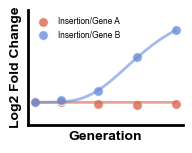

In [13]:
fig, ax = plt.subplots(figsize=(2, 1.5))

colors = {
    3: "#d7674f",
    6: "#698dda"
}

labels = {
    3: "Insertion/Gene A",
    6: "Insertion/Gene B"
}

for i in [3, 6]:
    x = np.array([0.0, 2.352, 5.588, 9.104, 12.48])
    y = curve_data.iloc[i, :][["t0", "t1", "t2", "t3", "t4"]].values
    A, um, lam = curve_data.iloc[i, :][["A", "um", "lam"]].values
    ax.scatter(x, y, 
                  color=colors[i], 
                  s=50, alpha=0.8, 
                  edgecolors='white', linewidth=0.8,
                  label=labels[i])
        
    # Plot fitted curve
    x_smooth = np.linspace(min(x), max(x), 100)
    y_fit = gompertz_function(x_smooth, A, um, lam)
    ax.plot(x_smooth, y_fit, 
            color=colors[i], 
            linewidth=2.0, alpha=0.6)
ax.set_ylim(-1.5, 6)
ax.tick_params(labelsize=8, labelleft=False, labelbottom=False, left=False, bottom=False)
ax.set_xlabel("Generation", fontsize=10)
ax.set_ylabel("Log2 Fold Change", fontsize=10)
ax.legend(frameon=False, fontsize=6)
plt.show()
# plt.savefig("test.svg", dpi=300, bbox_inches='tight', transparent=True)
plt.close()

# Make explainatory plot

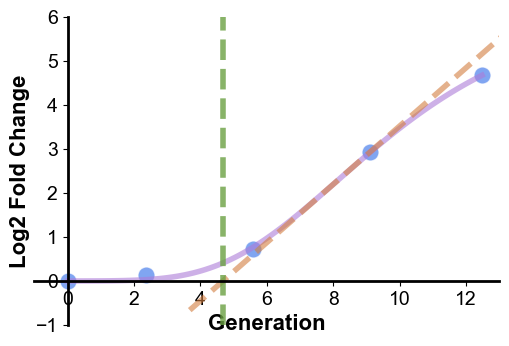

In [34]:
fig, ax = plt.subplots(figsize=(6, 4))

x = np.array([0.0, 2.352, 5.588, 9.104, 12.48])
y = curve_data.iloc[6, :][["t0", "t1", "t2", "t3", "t4"]].values
A, um, lam = curve_data.iloc[6, :][["A", "um", "lam"]].values
ax.scatter(x, y, 
                                color=COLORS["periwinkle_blue"], 
                                s=150, alpha=0.8, 
                                edgecolors='white', linewidth=0.8)
        
# Plot fitted curve
x_smooth = np.linspace(min(x), max(x), 100)
y_fit = gompertz_function(x_smooth, A, um, lam)
ax.plot(x_smooth, y_fit, 
                color=COLORS["orchid_purple"],
                linewidth=4, alpha=0.6)

x_line = np.linspace(lam-1, 14, 100)
y_line = um * (x_line - lam)
ax.plot(x_line, y_line, color=COLORS["amber_orange"], linestyle='--', alpha=0.6, linewidth=4)

ax.axvline(x=lam, color=COLORS["olive_green"], 
                  linestyle='--', alpha=0.8, linewidth=4)

# Set axis limits to include (0,0) and move spines to zero
ax.set_xlim(-1, 13)
ax.set_ylim(-1, 6)

# Move spines to zero
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(labelsize=14, labelleft=True, labelbottom=True, left=True, bottom=True)
ax.set_xlabel("Generation", fontsize=16)
ax.set_ylabel("Log2 Fold Change", fontsize=16)

plt.show()
plt.close()

# Make 5 exmaple plots

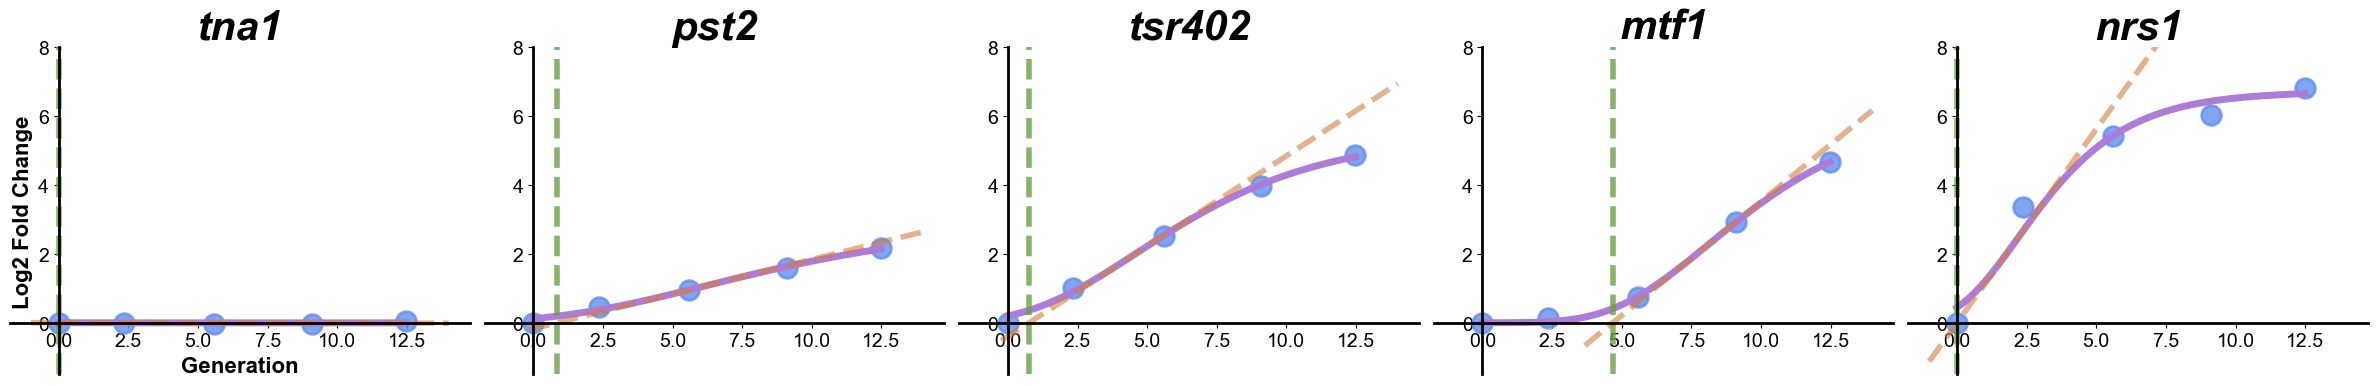

In [37]:
fig, axes = plt.subplots(1, 5, figsize=(24, 4), sharex=True, sharey=True)

labels = {
    "SPAC1002.16c": "tna1",
    "SPAC23C11.15": "pst2",
    "SPAC13G6.09": "tsr402",
    "SPAC1002.08c": "mtf1",
    "SPBC1773.10c": "nrs1",
}

for idx, (sysID, gene) in enumerate(labels.items()):
    ax = axes[idx]
    x = np.array([0.0, 2.352, 5.588, 9.104, 12.48])
    y = curve_data.loc[sysID, :][["t0", "t1", "t2", "t3", "t4"]].values
    A, um, lam = curve_data.loc[sysID, :][["A", "um", "lam"]].values
    ax.scatter(x, y,
                  s=200, alpha=0.8, color=COLORS["periwinkle_blue"])
        
    # Plot fitted curve
    x_smooth = np.linspace(min(x), max(x), 100)
    y_fit = gompertz_function(x_smooth, A, um, lam)
    ax.plot(x_smooth, y_fit, color=COLORS["orchid_purple"],
            linewidth=5, alpha=1)

    ax.axvline(x=lam, color=COLORS["olive_green"], 
                  linestyle='--', alpha=0.8, linewidth=4)
        # add the straight line that crosses with the x axis at x=lam, and with the slope of um
    x_line = np.linspace(lam-1, 14, 100)
    y_line = um * (x_line - lam)
    ax.plot(x_line, y_line, color=COLORS["amber_orange"], linestyle='--', alpha=0.6, linewidth=4)
    ax.set_ylim(-1.5, 8)
    ax.tick_params(labelsize=14, labelleft=True, labelbottom=True)
    if idx == 0:
        ax.set_xlabel("Generation", fontsize=16)
        ax.set_ylabel("Log2 Fold Change", fontsize=16)
    ax.legend(frameon=False, fontsize=6)
    ax.set_title(gene, fontsize=30, fontstyle='italic', fontweight='bold')

    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()
# plt.savefig("gene_examples.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.close()

# DR-DL histogram

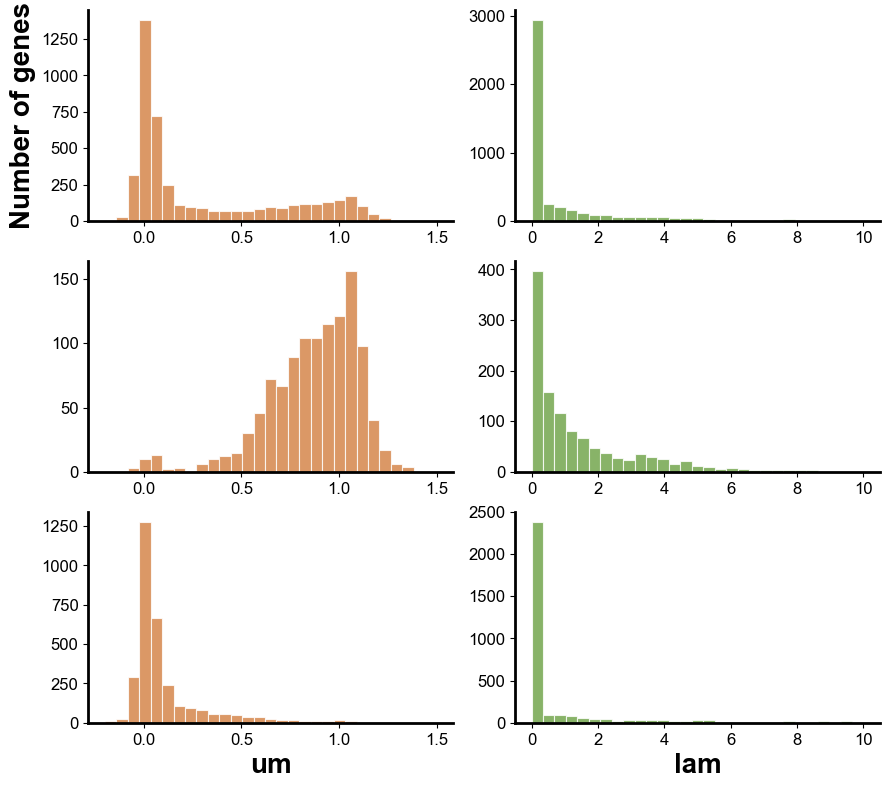

In [55]:
fig, axes = plt.subplots(3, 2, figsize=(9, 8))

bins = {
    "um": np.linspace(-0.2, 1.5, 30),
    "lam": np.linspace(0, 10, 30)
}

customed_colors = [
    [COLORS["amber_orange"], COLORS["olive_green"]],
    [COLORS["amber_orange"], COLORS["olive_green"]],
    [COLORS["amber_orange"], COLORS["olive_green"]],
]

for row, row_data in enumerate([curve_data, curve_data.query("DeletionLibrary_essentiality == 'E'"), curve_data.query("DeletionLibrary_essentiality == 'V'")]):
    for col, col_feature in enumerate(["um", "lam"]):
        ax = axes[row, col]
        ax.hist(row_data[col_feature], bins=bins[col_feature],
                color=customed_colors[row][col],
                edgecolor='white', linewidth=0.8, alpha=0.8)
        if row == 2:
            ax.set_xlabel(col_feature, fontsize=20)
        if row == 0 and col == 0:
            ax.set_ylabel("Number of genes", fontsize=20)
plt.tight_layout()
plt.show()
plt.close()